In [1]:
#! /usr/bin/env python


# bb2 Project

#
# License: see LICENSE.md
#
# Copyright (C) 2021  Neal Patwari
#
# 
# Author: Neal Patwari, npatwari@wustl.edu
#
# Version History:
#
# Version 1.0:  Initial Release.  Feb 2021.  For Python 3.6.10
#

import sys
import numpy as np
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal
import scipy.io
import digicomm

# Make plot text a readable size.
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
plt.ion()

# Possible modes: 
# 1: 'test' mode which allows you to show what would be tranmitted 
#    for a fake data bit list
# 2: 'instructor', what I use to generate the received signal
# 3: 'assignment', what you us to build a receiver to work with the 
#    given saved received signal.
mode = 2

## Transmitter Code

This code is run by your instructor. A secret string is picked, encoded, and transmitted signal generated.

In [2]:
#################################################
# Signal Generation
# INPUT:  none
# OUTPUT: binary data
if mode == 2:
    temp      = 'ESE 471';
    data      = digicomm.text2bits(temp);
else:
    data      = [1, 0, 0, 1];
    
print(data)

[1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1.]


In [3]:
#################################################
# Modulation
# INPUT: data
# OUPUT: modulated values, x
symbolNumToValue = {
    0: -1, 
    1: +1
}
x = np.array([symbolNumToValue[b] for b in data])

print(x)

[ 1 -1 -1 -1  1 -1  1  1 -1  1 -1 -1  1  1  1 -1 -1 -1  1 -1  1 -1  1 -1
 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1
  1]


[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0

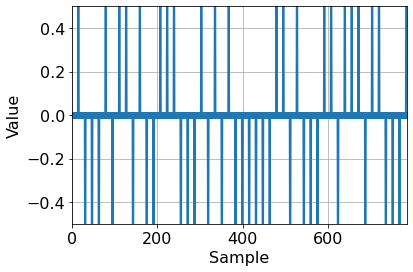

In [4]:
#################################################
# Upsample
# INPUT: modulated values, x
# OUTPUT: modulated values at sampling rate, x_s
T_s = 16
x_s = digicomm.oversample( x, T_s)

print(x_s)

# Plot for project handout
plt.figure(1)
plt.plot(x_s, '-o', linewidth=2)
plt.ylim([-0.5, 0.5])
plt.xlim([0, len(x_s)])
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.grid('on')

In [5]:
#################################################
# Pulse-shape filter
# INPUT: modulated values at sampling rate, x_s
# OUTPUT: baseband transmit signal s
pulse = np.sqrt(1./T_s)*np.ones(T_s)

print(pulse)

[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25]


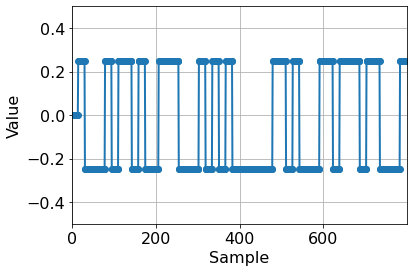

In [6]:
s     = np.convolve(x_s, pulse)

# THIS IS THE TRANSMITTED SIGNAL
# Plot for project handout
plt.figure(1)
plt.plot(s, '-o', linewidth=2)
plt.ylim([-0.5, 0.5])
plt.xlim([0, len(s)])
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.grid('on')

## Receiver Code:

The above "s" is what your instructor provides to you.  You will work on the receiver, starting from here.  Below is the receiver code for the binary baseband PAM receiver, ie., the solution.

[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25]


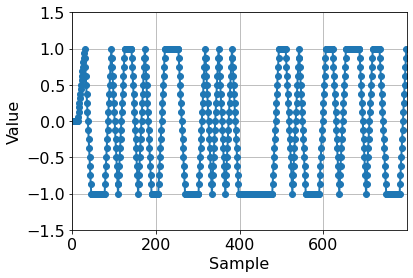

In [7]:
# Load s if doing the receiver assignment from a saved mat file
if mode == 3:
    temp = scipy.io.loadmat('bb2.mat')
    s    = temp['s'].flatten()

#################################################
#################################################
# Bipolar, baseband PAM receiver
#################################################
#################################################

#################################################
# Matched filter
# INPUT: baseband transmitted signal s
# OUTPUT: matched-filtered signal y
pulse = np.sqrt(1./T_s)*np.ones(T_s)

print(pulse)

y = scipy.signal.lfilter(pulse, 1, s);


# Plot for project handout
plt.figure(2)
plt.plot(y, '-o', linewidth=2)
plt.ylim([-1.5, 1.5])
plt.xlim([0, len(y)])
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.grid('on')

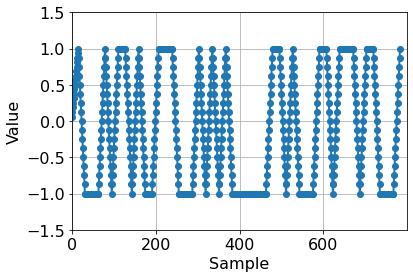

In [8]:
#################################################
# Time Synch
# Input: Matched Filter output
# OUTPUT: Synched MF output with samples at US_Rate, 2*US_Rate, ...
# *** Note: User must set this by looking at y and seeing the 
#     first index at which the first symbol sample should be read.
y_s  = y[15:]

# Plot to see what changed
plt.figure(2)
plt.plot(y_s, '-o', linewidth=2)
plt.ylim([-1.5, 1.5])
plt.xlim([0, len(y)])
plt.xlabel('Sample', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.grid('on')

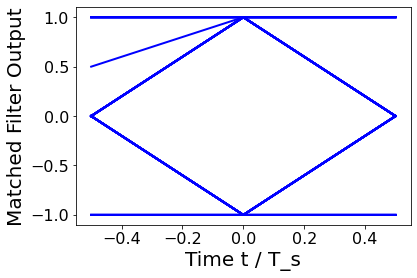

In [9]:
# Plot eye-diagram
offset = 0
plt.figure(3)
digicomm.plot_eye_diagram(y_s, T_s, offset)

In [10]:

#################################################
# Downsample
# INPUT: Synched matched filter output
# OUTPUT: Symbol Samples (at n*T_s)
r_hat     = y_s[range( T_s-1, len(y_s), T_s)] 

print(r_hat)


[ 1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1.  1. -1. -1. -1.
  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1.
  1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1. -1.  1.]


In [11]:
#################################################
# Bit decisions
# INPUT: Symbol Samples
# OUTPUT: Bits
data_out = (r_hat>0).astype(int)

print(data_out)

[1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 1 0 1 1 1 0 1 1 0 0 0 1]


In [12]:
#################################################
# Translate to ascii text
# INPUT: Bits
# OUTPUT: Character vector, message_out
if mode==3 or mode==2:
    message_out = digicomm.binvector2str(data_out)
    print(message_out)

ESE 471
